# Python assignment: replication study Acemoglu et al. 2001

|Name|ANR|
|----|-------|
|Gianluca Rodriquez|382065|
|Jaime Rozema|226581|



# Introduction

The paper by Acemoglu et al. (2001) has been one of the most influential studies on economic development to date. The authors revolutionized macroeconomic studies by being able to go beyond merely stating correlations. By introducing an instrumental variable approach, they were able to infer the effect of institutions on present-day economic performance. They found that in areas in which Europeans faced high mortality rates, the Europeans were more likely to set up extractive (bad) institutions centuries ago as they did not settle there. These institutions, in turn, seem to have had large effects on income per capita.

# Research question

We will replicate the results from Acemoglu et al. (2001) and thus adhere to their research question: "Do institutions affect long-run economic performance?"

# Motivation

By using the dataset and replicating the results by Acemoglu et al. (2001), we gain deeper understanding of the underlying assumptions in the paper and strengthen our programming skills in Python. Moreover, readers will easily see how we have reached our results and will be able to verify and replicate the results themselves. 

# Method

## Data

From our previous course (Methods: Econometrics 1), we were granted the dataset by Acemoglu et al. (2001). The dataset consists of 70 countries - all heavily influenced by Europeans - and the most important variables for our investigation are: the average protection against expropriation, the log of GDP per capita in 1995 (PPP), and the log of settler mortality.

## Instumental variable

To test for the effect of instutions on long-run economic performance, and to avoid selection bias, we use settler mortality as an instrumental variable to isolate part of the variation that is delivered randomly.

There are several assumptions that have to be fulfilled. Firstly, settler mortality has to be randomly assigned in order for the IV to isolate the variation that is random. Secondly, the settler mortality has to be a sufficiently strong instrument, which means that the portion of random variation in settler mortality should be large enough. Lastly, settler mortality may not affect present-day economic performance directly, only via the treatment (the quality of institutions).


In [14]:
import numpy as np
import pandas as pd
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean
from sklearn.decomposition import PCA, FactorAnalysis
import matplotlib.pyplot as plt

df = pd.read_excel('C:\Users\Jaime\Desktop\python.xls')

FORMAT = ['lat_abst', 'euro1900', 'excolony', 'avexpr', 'logpgp95', 'cons1', 'indtime', 'democ00a', 'cons00a', 'extmort4', 'logem4', 'country']
df_selected = df[FORMAT]

df


,lat_abst,euro1900,excolony,avexpr,logpgp95,cons1,indtime,democ00a,cons00a,extmort4,logem4,country
0,0.136667,8.000000,1,5.363636,7.770645,3,20,0,1,280.000000,5.634789,125
1,0.377778,60.000004,1,6.386364,9.133459,1,170,3,3,68.900002,4.232656,131
2,0.300000,98.000000,1,9.318182,9.897972,7,94,10,7,8.550000,2.145931,135
3,0.144444,0.000000,1,4.454545,6.845880,3,35,0,1,280.000000,5.634789,141
4,0.266667,0.000000,1,5.136364,6.877296,7,23,0,1,71.410004,4.268438,142
5,0.268333,10.000000,1,7.500000,9.285448,NaN,NaN,NaN,NaN,85.000000,4.442651,145
6,0.188889,30.000002,1,5.636364,7.926602,3,170,4,3,71.000000,4.262680,150
7,0.111111,40.000000,1,7.909091,8.727454,1,171,1,3,71.000000,4.262680,151
8,0.666667,99.000000,1,9.727273,9.986449,7,128,9,7,16.100000,2.778819,159
9,0.333333,50.000000,1,7.818182,9.336092,1,177,5,7,68.900002,4.232656,162


In [15]:
df.describe()

,lat_abst,euro1900,excolony,avexpr,logpgp95,cons1,indtime,democ00a,cons00a,extmort4,logem4,country
count,70.000000,69.000000,69.000000,70.000000,70.000000,60.00000,60.000000,59.000000,61.000000,70.000000,70.000000,70.000000
mean,0.195897,17.686957,0.927536,6.646104,8.141596,3.40000,89.633333,1.644068,2.229508,230.741714,4.542832,245.414286
std,0.147090,28.525453,0.261154,1.552533,1.059310,2.39491,64.077275,3.004380,2.100741,454.674996,1.357206,74.040626
min,0.000000,0.000000,0.000000,3.500000,6.109248,1.00000,20.000000,0.000000,1.000000,2.550000,0.936093,125.000000
25%,0.088889,0.000000,1.000000,5.659091,7.332610,1.00000,35.000000,0.000000,1.000000,68.075003,4.220586,184.250000
50%,0.166667,1.900000,1.000000,6.545455,8.026189,3.00000,46.000000,0.000000,1.000000,78.149998,4.358630,233.500000
75%,0.292083,20.000000,1.000000,7.568182,8.892192,7.00000,158.500000,1.000000,3.000000,168.665001,5.394429,318.500000
max,0.666667,100.000000,1.000000,10.000000,10.215740,7.00000,195.000000,10.000000,7.000000,2940.000000,7.986165,370.000000


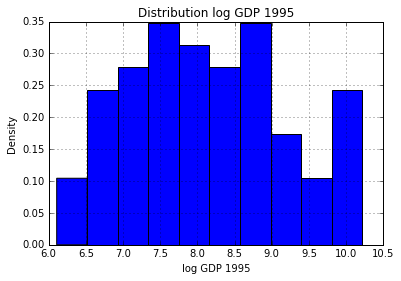

In [16]:
%matplotlib inline
log_GDP = df[['logpgp95']].hist(bins=10, normed=True)
plt.title('Distribution log GDP 1995')
plt.xlabel('log GDP 1995')
plt.ylabel('Density')
plt.show()

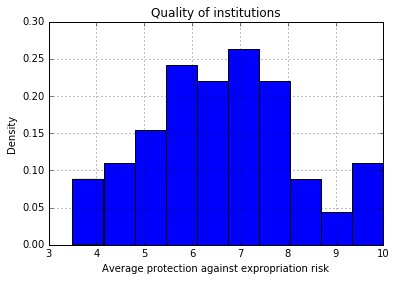

In [17]:
%matplotlib inline
log_GDP = df[['avexpr']].hist(bins=10, normed=True)
plt.title('Quality of institutions')
plt.xlabel('Average protection against expropriation risk')
plt.ylabel('Density')
plt.show()

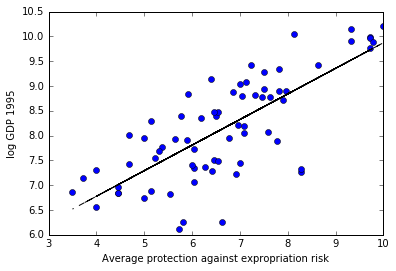

In [18]:
# correlation log GDP 1995 and av. protection against expropriation risk
x = df['avexpr']
y = df['logpgp95']

plt.xlabel('Average protection against expropriation risk')
plt.ylabel('log GDP 1995')

fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
plt.plot(x, y, 'bo', x, fit_fn(x), '--k')
plt.show()

In [19]:
#naive regression

import statsmodels.formula.api as smf    # for the ols and robust ols model
import statsmodels.api as sm
formula = "logpgp95 ~ avexpr"
results = smf.ols(formula,df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     90.69
Date:                Tue, 16 Jan 2018   Prob (F-statistic):           3.87e-14
Time:                        15:23:22   Log-Likelihood:                -73.194
No. Observations:                  70   AIC:                             150.4
Df Residuals:                      68   BIC:                             154.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.7135      0.370     12.755      0.0

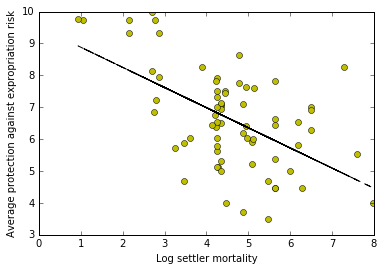

In [20]:
# IV: correlation av. protection against expropriation risk and settler mortality
x = df['logem4']
y = df['avexpr']

plt.xlabel('Log settler mortality')
plt.ylabel('Average protection against expropriation risk')

fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
plt.plot(x, y, 'yo', x, fit_fn(x), '--k')
plt.show()

In [21]:
# Is IV sufficiently strong? (Reduced form???)

formula = "logpgp95 ~ logem4"
results = smf.ols(formula,df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     66.27
Date:                Tue, 16 Jan 2018   Prob (F-statistic):           1.22e-11
Time:                        15:23:22   Log-Likelihood:                -79.044
No. Observations:                  70   AIC:                             162.1
Df Residuals:                      68   BIC:                             166.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     10.6326      0.319     33.313      0.0

In [35]:
#First stage: regress avexpr logem4

formula = "avexpr ~ logem4"
results = smf.ols(formula,df).fit()
print(results.summary())
df['avexpr_hat'] = results.fittedvalues #saving fitted values for second stage


                            OLS Regression Results                            
Dep. Variable:                 avexpr   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     29.80
Date:                Tue, 16 Jan 2018   Prob (F-statistic):           7.29e-07
Time:                        15:38:11   Log-Likelihood:                -116.90
No. Observations:                  70   AIC:                             237.8
Df Residuals:                      68   BIC:                             242.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.5146      0.548     17.359      0.0

In [37]:
#Second stage: regress logpgp95 avexpr_hat (predicted values for avexpr)
formula = "logpgp95 ~ avexpr_hat"
results = smf.ols(formula,df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     66.27
Date:                Tue, 16 Jan 2018   Prob (F-statistic):           1.22e-11
Time:                        15:40:03   Log-Likelihood:                -79.044
No. Observations:                  70   AIC:                             162.1
Df Residuals:                      68   BIC:                             166.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.3702      0.715      3.316      0.0

In [40]:
#omitted variable

#first stage
formula = "avexpr ~ logem4 + lat_abst"
results = smf.ols(formula,df).fit()
#print(results.summary())
df['avexpr_hat2'] = results.fittedvalues #saving fitted values for second stage

#second stage
formula = "logpgp95 ~ avexpr_hat2 + lat_abst"
results = smf.ols(formula,df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     36.61
Date:                Tue, 16 Jan 2018   Prob (F-statistic):           1.80e-11
Time:                        15:42:31   Log-Likelihood:                -77.006
No. Observations:                  70   AIC:                             160.0
Df Residuals:                      67   BIC:                             166.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       1.6517      0.968      1.707      

In [ ]:
#exclusion restriction should be discussed as well